# requests 모듈


### 1. requests() == 요청값

### 2. get() == return 응답값

-----------------------------------

In [1]:
import requests

# requests 모듈의 경로를 알려준다.
print(requests) 

<module 'requests' from 'C:\\Users\\ond\\anaconda3\\lib\\site-packages\\requests\\__init__.py'>


In [3]:
# function get
print(requests.get) # get 요청을 보내는 기능

<function get at 0x000001F425AC39D0>


### client = request => sever = response => client

request == daum, naver등 웹

response == html 정보

서버는 요청에 대한 응답을 하는 역할

클라이언트는 응답값을 받는 역할

--------------------------------

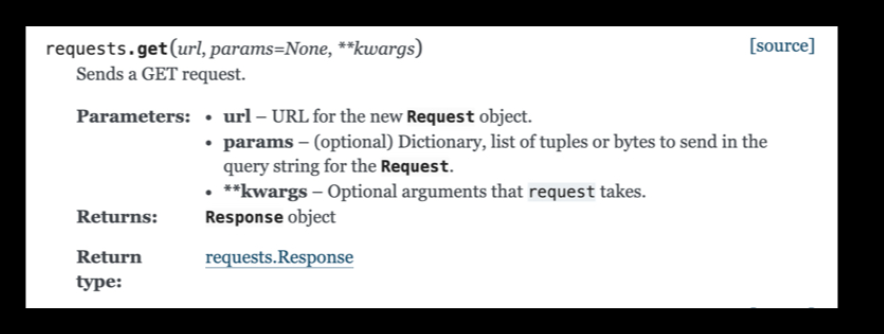

requests.get(url)

return : request.response

----------------------------

# response 메서드 기능

In [17]:
import requests

url = "http://www.google.com"
requests.get(url)

# 코드를 실행한 순간 get 함수는 서버 주소로 요청을 보냈다.
# <Response [200]> == 200 이라는 숫자는 코딩에서 성공을 의미한다.
response = requests.get(url)


# response.text == html 코드를 가져온다.
# response.encoding == 어떤 언어로 구성되어있는지

#print(response.text) 
#print(response.url)
#print(response.content)
#print(response.encoding)
#print(response.headers)
#print(response.json)
#print(response.links)
#print(response.ok)
print(response.status_code)

200


------------------------------------------

In [39]:
import requests
from bs4 import BeautifulSoup
# 필요한 결과값만 뽑아내자! BeautifulSoup

url = "http://www.daum.net"
requests.get(url)
response = requests.get(url)

#두 print 구문이 같아 보이지만 내적으로는 다른 구문이다.
# 문자열 덩어리를 BeautifulSoup로 정제
#print(type(response.text))
#print(type(BeautifulSoup(response.text, 'html.parser')))

<class 'str'>
<class 'bs4.BeautifulSoup'>


______________________

# BeautifulSoup
## (데이터,파싱 방법)

data : BeautifulSoup에 담을 재료 (HTML과 XML이 올 수 있다.)

Parsing : data를 의미있게 바꾸는 과정

parser : Parsing을 도와주는 프로그램을 parser라고 부른다. (html.parser)

ex )BeautifulSoup(response.text, 'html.parser')

In [41]:
soup = BeautifulSoup(response.text, 'html.parser')

In [42]:
print(soup.title) # html 그대로 가져온다.

<title>Daum</title>


In [44]:
#print(response.text[:500])

<!DOCTYPE html>
<html lang="ko" class="">
<head>
<meta charset="utf-8"/>
<title>Daum</title>
<meta property="og:url" content="https://www.daum.net/">
<meta property="og:type" content="website">
<meta property="og:title" content="Daum">
<meta property="og:image" content="//i1.daumcdn.net/svc/image/U03/common_icon/5587C4E4012FCD0001">
<meta property="og:description" content="나의 관심 콘텐츠를 가장 즐겁게 볼 수 있는 Daum">
<meta name="msapplication-task" content="name=Daum;action-uri=https://www.daum.net/;icon-uri


In [45]:
print(soup.title.string) # 실제 값만 가져온다.

Daum


In [49]:
print(soup.span) # 상단에 있는 span 하나만 가져온다.
print(soup.span.string)

<span class="ico_vert inner_shortcut">주요 서비스 바로가기</span>
주요 서비스 바로가기


In [52]:
print(soup.findAll('span')) # 모든 span tag를 가져온다.

[<span class="ico_vert inner_shortcut">주요 서비스 바로가기</span>, <span class="ico_vert inner_shortcut">오늘의 정보 바로가기</span>, <span class="ico_vert inner_shortcut">미디어 바로가기</span>, <span class="ico_vert inner_shortcut">실시간 이슈 바로가기</span>, <span class="ico_vert inner_shortcut">멀티미디어 바로가기</span>, <span class="ico_vert inner_shortcut">블로그 정보 바로가기</span>, <span class="ico_vert inner_shortcut">유익한 정보 바로가기</span>, <span class="ico_vert inner_shortcut">쇼핑 바로가기</span>, <span class="ico_vert inner_shortcut">오늘의 포토&amp;영상 바로가기</span>, <span class="ico_vert inner_shortcut">웹 접근성 안내</span>, <span class="ico_vert inner_shortcut">자동실행 광고 설정</span>, <span class="ir_wa">한글입력기</span>, <span class="ir_wa">검색</span>, <span class="ir_wa">&lt;이전</span>, <span class="ir_wa">&gt;다음</span>, <span class="ir_wa">카페</span>, <span class="ir_wa">메일</span>, <span class="ir_wa">뉴스</span>, <span class="ir_wa">지도</span>, <span class="ir_wa">증권</span>, <span class="ir_wa">쇼핑</span>, <span class="ir_wa">카카오TV</span>, <span class

-------------------------------

# 실시간 검색어 뽑아오기

In [54]:
# html 파일 만들기 
file = open("daum.html","w") # w: 쓰기 / r: 읽기 / a: 추가하기
file.write(response.text)
file.close()

# 위 코드를 입력하면 새로운 html 파일이 생성된다.
# html안의 코드를 통해 데이터를 뽑아 낼 수 있다.
# tag를 주의 깊게 살펴보자
# 가져오고자 하는 데이터들의 공통점을 찾아야 가져오기 편하다


UnicodeEncodeError: 'cp949' codec can't encode character '\u22c1' in position 127562: illegal multibyte sequence

In [59]:
#html 문서에서 모든 a 태그를 가져오는 코드
results = soup.findAll("a","link_favorsch") # == a tag 중 link_favorsch tag만 가져와라

# 출력하기

In [77]:
from datetime import datetime

search_rank_file = open("rankresult.text","a") # 반복문과 연결

print(datetime.today().strftime("%Y년 %m월 %d일의 실시간 검색어 \n"))
# 반복문 사용
rank = 1
for result in results:
    search_rank_file.write(str(rank) +"위:" + result.get_text() +"\n") #
    print(rank,"위 :",result.get_text(),"\n")
    rank += 1

2021년 07월 26일의 실시간 검색어 

1 위 : 코로나19 발생현황 

2 위 : 지창욱 확진 

3 위 : 벽부형핸드레일 

4 위 : 김규리 캐스팅 

5 위 : 골프용품 

6 위 : 사회적 거리두기 

7 위 : 장기용 입대발표 

8 위 : 방초매트 

9 위 : 자이언티 합류 

10 위 : 남성빅사이즈몰 

11 위 : 이대훈 은퇴선언 

12 위 : 김민귀 사과 

13 위 : 영흥도펜션 

14 위 : 하석진 전속계약 

15 위 : 여름이불패드세트 



--------------------------

# 파일로 출력하기

In [2]:
from bs4 import BeautifulSoup
import requests
from datetime import datetime

url = "http://www.daum.net/"
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')
rank = 1

results = soup.findAll('a','link_favorsch')

search_rank_file = open("rankresult.txt","a")

print(datetime.today().strftime("%Y년 %m월 %d일의 실시간 검색어 순위입니다.\n"))

for result in results:
    search_rank_file.write(str(rank) + "위:"+ result.get_text()+"\n")
    print(rank,"위 :", result.get_text(),"\n")
    rank += 1

2021년 07월 27일의 실시간 검색어 순위입니다.

1 위 : 코로나19 발생현황 

2 위 : 김이나X선우정아 

3 위 : 개업화분 

4 위 : 한혜진 완치 

5 위 : 창문가리개 

6 위 : 사회적 거리두기 

7 위 : 머선129 전소미 

8 위 : 중고차매매 

9 위 : 김소혜 공식입장 

10 위 : 에어컨청소업체 



# 응용 해보기

In [4]:
from bs4 import BeautifulSoup
import requests
from datetime import datetime

# naver
# 물음표 뒷 부분은 파라미터 == 서버를 만들때 재료로 사용된다.
# headers == naver 등 웹 사이트는 각자 규정에 따라 웹 크롤링을 허용하지 않는 경우가 있다.
# naver의 경우 크롤링 봇이 아니라는 headers를 등록하면 크롤링이 가능하다.

headers = {'User-Agent':'Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/63.0.3239.132 Safari/537.36'}
url = "http://www.datalab.naver.com/keyword/realtimeList.naver?age=20s"
response = requests.get(url,headers=headers)
soup = BeautifulSoup(response.text, 'html.parser')
rank = 1

# span - item_title
# 각 사이트마다 태그가 다르기 때문에 원하는 자료의 태그를 찾아봐야한다.
results = soup.findAll('span','item_title')

print(response.text)

search_rank_file = open("rankresult.txt","a")

print(datetime.today().strftime("%Y년 %m월 %d일의 실시간 검색어 순위입니다.\n"))

for result in results:
    search_rank_file.write(str(rank) + "위:"+ result.get_text()+"\n")
    print(rank,"위 :", result.get_text(),"\n")
    rank += 1

ConnectionError: HTTPConnectionPool(host='www.datalab.naver.com', port=80): Max retries exceeded with url: /keyword/realtimeList.naver?age=20s (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x00000212C85B9640>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))

# 최종